# Using SEL values to do a regression analysis

For each type of SEL, slowly add more variables to regression analysis.

-Shot volume

-Bathymetry

-Depth of Crust

-Simple sound speed profiles

In [4]:
import numpy as np
from numpy.matlib import repmat
from matplotlib import pyplot as plt
import xarray as xr
import sys
import os
from scipy import signal
import scipy.stats as stats
import time
from sklearn.linear_model import LinearRegression

from MGL2104_funcs import *


In [5]:

SELdata = xr.load_dataset('/media/asd21/My Passport/SEL_Parsed_Data.nc')
SELall = SELdata['SELall']
SELrefs = SELdata['SELrefs']
SELref1 = SELdata['SELref1']
SELnofilt = SELdata['SELnofilt']
recLocs = SELdata['Receiver Coordinates']
srcLocs = SELdata['Source Coordinates']
vesselLocs = SELdata['Vessel Coordinates']
shotVols = SELdata['Shot Volumes']
bathymetry = SELdata['Bathymetry']
receiver = SELdata['receiver']
Fc = SELdata['center frequency']
dimension = SELdata['dimension']

del SELdata


0.5165876820961923
[[0.00488526]]
[166.3372347]


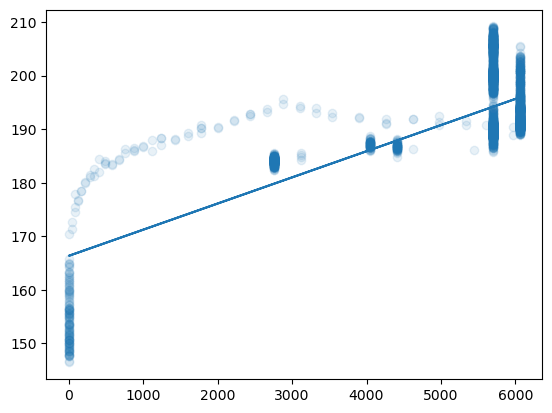

In [88]:
rec = 10
fi = 0

# Different X inputs
# X = np.array(bathymetry).reshape(-1,1)
X = np.array(shotVols).reshape(-1,1)

# SEL Input
y = 10*np.log10(np.array(SELall[:,rec,fi])/(20e-6)**2).reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)
print(reg.score(X,y))
print(reg.coef_)
print(reg.intercept_)

plt.scatter(X,y,alpha=0.1)
plt.plot(X,reg.predict(X))
plt.show()